In [17]:
#Import neccessary libaries 
import pandas as pd

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
#read the dataset which has dates, devices and it metrics and whether is failure or Not failure
dataset = pd.read_csv(r"predictive_maintenance_dataset.csv")
dataset

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [20]:
#checking if any null values present in the dataset 
dataset.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [22]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [23]:
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day
df = dataset.drop(['date', 'device'], axis=1)
df

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,year,month,day
0,0,215630672,55,0,52,6,407438,0,0,7,2015,1,1
1,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1
2,0,173295968,0,0,0,12,237394,0,0,0,2015,1,1
3,0,79694024,0,0,0,6,410186,0,0,0,2015,1,1
4,0,135970480,0,0,0,15,313173,0,0,3,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,18310224,0,0,0,10,353705,8,8,0,2015,11,2
124490,0,172556680,96,107,4,11,332792,0,0,13,2015,11,2
124491,0,19029120,4832,0,0,11,350410,0,0,0,2015,11,2
124492,0,226953408,0,0,0,12,358980,0,0,0,2015,11,2


In [25]:
# Apparently the data is highly imbalanced 
df["failure"].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [26]:
df.columns

Index(['failure', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'metric7', 'metric8', 'metric9', 'year', 'month', 'day'],
      dtype='object')

In [27]:
df

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,year,month,day
0,0,215630672,55,0,52,6,407438,0,0,7,2015,1,1
1,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1
2,0,173295968,0,0,0,12,237394,0,0,0,2015,1,1
3,0,79694024,0,0,0,6,410186,0,0,0,2015,1,1
4,0,135970480,0,0,0,15,313173,0,0,3,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,18310224,0,0,0,10,353705,8,8,0,2015,11,2
124490,0,172556680,96,107,4,11,332792,0,0,13,2015,11,2
124491,0,19029120,4832,0,0,11,350410,0,0,0,2015,11,2
124492,0,226953408,0,0,0,12,358980,0,0,0,2015,11,2


In [28]:
# Since the data is so imbalanced, hence applying Over sampling and undersampling technique
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Indep_var = df.drop('failure', axis=1)
dep_var = df['failure']

# Oversample the minority class
ros = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = ros.fit_resample(Indep_var, dep_var )

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(Indep_var , dep_var )

# Display the new class distributions
print("Class distribution after oversampling:")
print(y_resampled_over.value_counts())
print("\nClass distribution after undersampling:")
print(y_resampled_under.value_counts())

Class distribution after oversampling:
failure
0    124388
1    124388
Name: count, dtype: int64

Class distribution after undersampling:
failure
0    106
1    106
Name: count, dtype: int64


In [16]:
#from imblearn.combine import SMOTETomek

#smt = SMOTETomek(random_state=42)
#X_resampled_combined, y_resampled_combined = smt.fit_resample(Indep_var, dep_var)

# Display the new class distribution
#y_resampled_combined.value_counts()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled_over, y_resampled_over, test_size=0.3,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_logreg = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2'],
    'C': [10, 100, 1000, 2000, 3000]
}

param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

param_grid_RF = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [10, 100]
}

# Create GridSearchCV for Logistic Regression
grid_logreg = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=param_grid_logreg,
                           refit=True,
                           verbose=3,
                           n_jobs=-1,
                           scoring='f1_weighted')

# Create GridSearchCV for Decision Tree
grid_DT = GridSearchCV(estimator=DecisionTreeClassifier(),
                       param_grid=param_grid_DT,
                       refit=True,
                       verbose=3,
                       n_jobs=-1,
                       scoring='f1_weighted')

# Create GridSearchCV for Random Forest
grid_RF = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=param_grid_RF,
                       refit=True,
                       verbose=3,
                       n_jobs=-1,
                       scoring='f1_weighted')

# Fit the models for grid search
grid_logreg.fit(X_train, Y_train)
grid_DT.fit(X_train, Y_train)
grid_RF.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='f1_weighted', verbose=3)

In [33]:
grid_predictions = grid_logreg.predict(X_test) 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test,grid_predictions)
cl_rep = classification_report(Y_test,grid_predictions)
print("Confusion Matrics for Log reg\n", cm,'\n')
print("Classification report for Log reg\n", cl_rep)

Confusion Matrics for Log reg
 [[35984  1371]
 [16906 20372]] 

Classification report for Log reg
               precision    recall  f1-score   support

           0       0.68      0.96      0.80     37355
           1       0.94      0.55      0.69     37278

    accuracy                           0.76     74633
   macro avg       0.81      0.75      0.74     74633
weighted avg       0.81      0.76      0.74     74633



In [35]:
grid_predictions = grid_RF.predict(X_test) 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test,grid_predictions)
cl_rep = classification_report(Y_test,grid_predictions)
print("Confusion Matrisc for Random Forest\n", cm,'\n')
print("Classification report for Random Forest\n", cl_rep)

Confusion Matrisc for Random Forest
 [[37344    11]
 [    0 37278]] 

Classification report for Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37355
           1       1.00      1.00      1.00     37278

    accuracy                           1.00     74633
   macro avg       1.00      1.00      1.00     74633
weighted avg       1.00      1.00      1.00     74633



In [36]:
grid_predictions = grid_DT.predict(X_test) 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test,grid_predictions)
cl_rep = classification_report(Y_test,grid_predictions)
print("Confusion Matric for Decision Tree\n", cm,'\n')
print("Classification report for Decision Tree\n", cl_rep)

Confusion Matric for Decision Tree
 [[37331    24]
 [    0 37278]] 

Classification report for Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37355
           1       1.00      1.00      1.00     37278

    accuracy                           1.00     74633
   macro avg       1.00      1.00      1.00     74633
weighted avg       1.00      1.00      1.00     74633



ROC-AUC Score: 0.8524114132992977


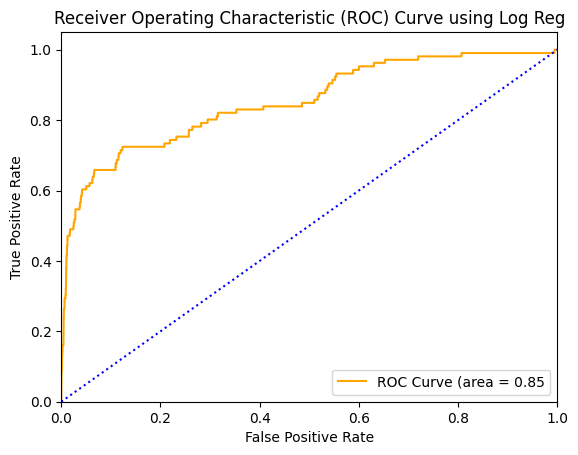

In [37]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc = roc_auc_score(Y_test,grid_logreg.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)
tpr,fpr,_ = roc_curve(Y_test,grid_logreg.predict_proba(X_test)[:,1])
auc = auc(tpr,fpr)
plt.figure
plt.plot(tpr,fpr,color='orange', label="ROC Curve (area = {:.2f}".format(auc))
plt.plot([0,1],[0,1],color ='blue',linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using Log Reg')
plt.legend(loc="lower right")
plt.show()

ROC-AUC Score: 0.9996787578637397


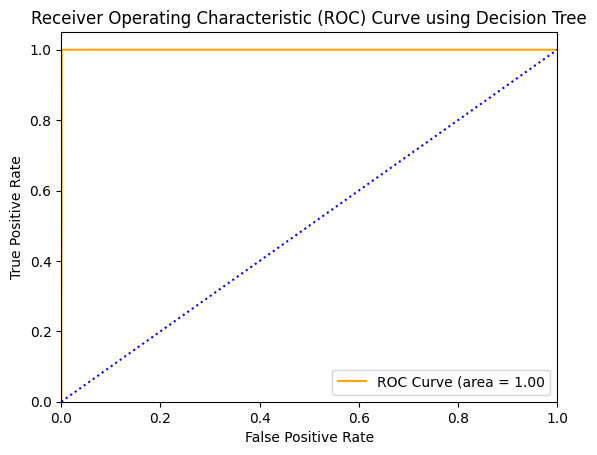

In [38]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc = roc_auc_score(Y_test,grid_DT.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)
tpr,fpr,_ = roc_curve(Y_test,grid_DT.predict_proba(X_test)[:,1])
auc = auc(tpr,fpr)
plt.figure
plt.plot(tpr,fpr,color='orange', label="ROC Curve (area = {:.2f}".format(auc))
plt.plot([0,1],[0,1],color ='blue',linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using Decision Tree')
plt.legend(loc="lower right")
plt.show()

ROC-AUC Score: 0.9999866149109892


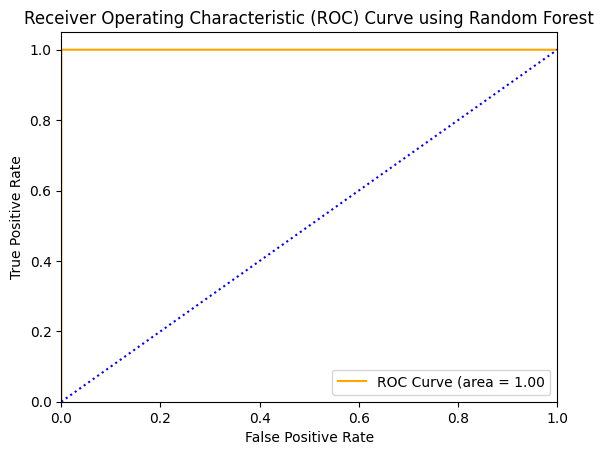

In [39]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc = roc_auc_score(Y_test,grid_RF.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)
tpr,fpr,_ = roc_curve(Y_test,grid_RF.predict_proba(X_test)[:,1])
auc = auc(tpr,fpr)
plt.figure
plt.plot(tpr,fpr,color='orange', label="ROC Curve (area = {:.2f}".format(auc))
plt.plot([0,1],[0,1],color ='blue',linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using Random Forest')
plt.legend(loc="lower right")
plt.show()

In [40]:
re = grid_logreg.cv_results_
result = pd.DataFrame.from_dict(re)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,28.098687,0.692864,0.045209,0.005401,10,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.747751,0.758475,0.750709,0.752642,0.749623,0.751840,0.003676,2
1,2.017867,0.095760,0.060277,0.007427,10,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.636830,0.633707,0.629765,0.636712,0.637156,0.634834,0.002824,6
2,5.193075,0.574329,0.059475,0.016536,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.631442,0.622162,0.613449,0.633224,0.634013,0.626858,0.007932,11
3,19.582931,0.604912,0.045346,0.007789,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.522332,0.519308,0.512233,0.521981,0.518174,0.518806,0.003643,20
4,25.449890,0.404616,0.042727,0.003368,100,l2,newton-cg,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-...",0.746731,0.753945,0.755279,0.753569,0.754330,0.752771,0.003073,1
5,1.572391,0.029507,0.049053,0.004538,100,l2,lbfgs,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}",0.636830,0.633707,0.629765,0.636712,0.637156,0.634834,0.002824,6
6,4.159280,0.266731,0.048629,0.007240,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.631442,0.622162,0.613449,0.633224,0.634013,0.626858,0.007932,11
7,17.100473,0.460206,0.048625,0.004823,100,l2,saga,"{'C': 100, 'penalty': 'l2', 'solver': 'saga'}",0.522487,0.519585,0.512324,0.521919,0.518298,0.518922,0.003634,16
8,23.653783,1.297120,0.054794,0.021226,1000,l2,newton-cg,"{'C': 1000, 'penalty': 'l2', 'solver': 'newton...",0.752444,0.748613,0.755306,0.753434,0.744855,0.750931,0.003741,4
9,1.768794,0.076628,0.054308,0.006392,1000,l2,lbfgs,"{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}",0.636830,0.633707,0.629765,0.636712,0.637156,0.634834,0.002824,6


In [41]:
re = grid_RF.cv_results_
result = pd.DataFrame.from_dict(re)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062526,0.002509,0.000000,0.000000,gini,auto,10,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.056914,0.009765,0.000000,0.000000,gini,auto,100,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,4.198752,0.298109,0.147063,0.011724,gini,sqrt,10,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.999770,0.999828,0.999885,0.999856,0.999856,0.999839,0.000039,6
3,40.766739,0.677412,0.957461,0.017712,gini,sqrt,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.999770,0.999828,0.999885,0.999943,0.999856,0.999856,0.000057,2
4,4.382638,0.081457,0.154057,0.006354,gini,log2,10,"{'criterion': 'gini', 'max_features': 'log2', ...",0.999713,0.999799,0.999885,0.999971,0.999770,0.999828,0.000091,8
5,41.659786,0.944313,0.945591,0.021089,gini,log2,100,"{'criterion': 'gini', 'max_features': 'log2', ...",0.999770,0.999856,0.999943,0.999914,0.999799,0.999856,0.000065,3
6,0.072097,0.004541,0.000000,0.000000,entropy,auto,10,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.065929,0.002934,0.000000,0.000000,entropy,auto,100,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,4.354141,0.280833,0.141047,0.004535,entropy,sqrt,10,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.999742,0.999885,0.999885,0.999856,0.999799,0.999833,0.000056,7
9,43.779010,0.781457,0.912328,0.029604,entropy,sqrt,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.999770,0.999799,0.999943,0.999856,0.999856,0.999845,0.000059,5


In [42]:
re = grid_DT.cv_results_
result = pd.DataFrame.from_dict(re)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061354,0.001195,0.000000,0.000000,gini,auto,best,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.050380,0.012954,0.000000,0.000000,gini,auto,random,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,0.553747,0.034789,0.059859,0.009543,gini,sqrt,best,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.999282,0.999742,0.999512,0.999397,0.999569,0.999500,0.000156,6
3,0.381729,0.016241,0.061811,0.005370,gini,sqrt,random,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.999397,0.999397,0.999541,0.999426,0.999569,0.999466,0.000074,7
4,0.669726,0.050846,0.061589,0.002176,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', ...",0.999627,0.999512,0.999541,0.999569,0.999454,0.999541,0.000057,2
5,0.455476,0.032264,0.063231,0.004043,gini,log2,random,"{'criterion': 'gini', 'max_features': 'log2', ...",0.999081,0.999541,0.999253,0.999225,0.999454,0.999311,0.000165,8
6,0.073809,0.007687,0.000000,0.000000,entropy,auto,best,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.067354,0.001152,0.000000,0.000000,entropy,auto,random,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.684036,0.080131,0.057848,0.001845,entropy,sqrt,best,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.999569,0.999483,0.999742,0.999512,0.999627,0.999587,0.000092,1
9,0.407547,0.041105,0.062859,0.007599,entropy,sqrt,random,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.999541,0.999368,0.999684,0.999569,0.999426,0.999518,0.000111,4
